# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.max_columns', None)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Высшее', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Маркетинг', 'Торговля', 'Сборочные производства', 'Развлечения/Искусство', 'Информационные услуги', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'ЧОП/Детективная д-ть', 'Образование', 'Страхование', 'Сельское хозяйство', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Строительство', 'Банк/Финансы', 'Салоны красоты и здоровья', 'Туризм', 'Информационные технологии', 'Наука', 'Подбор персонала', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Логистика', 'Энергетика', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [31]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

In [14]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,0,1,0,0,1,1,0,0,0,0,0,0,"3016,8",5,"335,2",0,0,96,39.0,1,0,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN,NaN,NaN,NaN,NaN,от 10000 до 20000 руб.,4100,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,0,0,1,0,1,0,6000,6,2000,0,1,299,NaN,0,0,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,40000,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,0,1,1,0,0,0,0,10000,6,2490,0,0,19,156.0,1,0,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,20000,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,1,0,0,0,0,0,0,5175,4,575,0,0,252,9.0,1,0,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,17000,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,13065,6,10000,0,0,36,84.0,0,0,1,1,1,5,0,0,0,0,NaN,test


#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть. `shape` говорит, что у нас 30133 строки. Для части столбцоа у нас всего 27420 записи.

С пропущенными числовыми данными можно бороться следующим образом:

1. удалить те строки, где пропущены численных значения;
2. заполнить пропущенные значения медианными;
3. в некоторых случаях пропуск данных можно интерпретировать как 0.

С пропусками по категориальным признакам бороться не будем — их сейчас сложно дозаполнить, хотя, видимо, можно взять среднее значение по близким группам. Пропуски по ним не превышают ~10% в пике, поэтому просто удалим строки с ними. Если они приходятся на одно и то же множество записей (например, по части клиентов просто нет части данных), то мы можем удалить эти записи, потеряв не более ~10% датафрейма.

Поля с пропущенными значениями:

| Признак                    | Описание                                                 | Категориальный? | None == 0?      |
|:---------------------------|:---------------------------------------------------------|:----------------|:----------------|
| GEN_INDUSTRY               | отрасль работы клиента                                   | Да              | Нет             |
| GEN_TITLE                  | должность                                                | Да              | Нет             |
| ORG_TP_STATE               | форма собственности компании                             | Да              | Нет             |
| ORG_TP_FCAPITAL            | отношение к иностранному капиталу                        | Да              | Нет             |
| JOB_DIR                    | направление деятельности в нутри компании                | Да              | Нет             |
| TP_PROVINCE                | область торговой точки, где клиент брал последний кредит | Нет*            | Нет             |
| WORK_TIME                  | время работы на текущем месте (в месяцах)                | Нет             | Не указано в описании, нет |
| PREVIOUS_CARD_NUM_UTILIZED | количество уже утилизированных карт ( если пусто - 0)    | Нет             | Да              |

Так, что:

1. Удаляем, где ('GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME', 'REGION_NM') is `None`.
2. Для PREVIOUS_CARD_NUM_UTILIZED проставляем `None` = 0, остальное оставляем, как есть (float64).

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Варианта два:

* закодировать через One-Hot Encoding, предварительно удалив данные с пропусками;
* для данных по регионам подобрать некие статистические соизмеримые между собой числоые метрики и закодировать ими регионы.

Признаки, +- подходящие для One-Hot Encoding:

* EDUCATION
* MARITAL_STATUS
* GEN_INDUSTRY (has None)
* GEN_TITLE (has None)
* ORG_TP_STATE (has None)
* ORG_TP_FCAPITAL (has None)
* JOB_DIR (has None)
* REGION_NM (has None)*

Признаки, не очень подходящие:

* REG_ADDRESS_PROVINCE
* FACT_ADDRESS_PROVINCE
* POSTAL_ADDRESS_PROVINCE
* TP_PROVINCE (has None)

Для второго списока попробуем подобрать статистику для представления в числовом формате. Используем медианные или последние значения доходов по регионам России: https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D1%85%D0%BE%D0%B4%D1%8B_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A0%D0%B5%D0%B3%D0%B8%D0%BE%D0%BD%D1%8B.

Соберем и отфильтруем регионы:

```python
from functools import reduce

regions = reduce((lambda all, feat: set(all).union(set(feat)) ), [
    df_preproc['REG_ADDRESS_PROVINCE'],
    df_preproc['FACT_ADDRESS_PROVINCE'],
    df_preproc['POSTAL_ADDRESS_PROVINCE'],
    df_preproc['TP_PROVINCE'],
])
```

Всего получилось 83 регисона. Для них составим `dict` с числовыми значениями, а потом применим к датафрейму.

Также у нас есть строковый столбец `FAMILY_INCOME`. Попробуем распарсить его регуляркой и вынести в два столбца:

* FAMILY_INCOME_MIN
* FAMILY_INCOME_MAX

Можно парсить регуляркой, но если значений окажется немного, проще составить словарь вида `{ key: (min, max) }`.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
from functools import reduce

regions = reduce((lambda all, feat: set(all).union(set(feat)) ), [
    df_preproc['REG_ADDRESS_PROVINCE'],
    df_preproc['FACT_ADDRESS_PROVINCE'],
    df_preproc['POSTAL_ADDRESS_PROVINCE'],
    df_preproc['TP_PROVINCE'],
])

In [15]:
REGIONS_INCOME = {
    'Мордовская республика': 20600,
    'Адыгея': 21500,
    'Брянская область': 20900,
    'Башкирия': 25200,
    'Мурманская область': 46400,
    'Ярославская область': 26000,
    'Воронежская область': 24300,
    'Томская область': 32000,
    'Карачаево-Черкесия': 20300,
    'Санкт-Петербург': 45900,
    'Тюменская область': 55200,
    'Тамбовская область': 20600,
    'Орловская область': 20700,
    'Амурская область': 30000,
    'Архангельская область': 37600,
    'Ставропольский край': 22800,
    'Ивановская область': 20500,
    'Липецкая область': 23100,
    'Пермская область': 27900,
    'Северная Осетия': 21400,
    'Алтайский край': 19200,
    'Усть-Ордынский Бурятский АО': 27800,
    'Ульяновская область': 22800,
    'Самарская область': 26400,
    'Горный Алтай': 22500,
    'Иркутская область': 31800,
    'Хабаровский край': 36900,
    'Ямало-Ненецкий АО': 78000,
    'Калмыкия': 19700,
    'Псковская область': 21200,
    'Владимирская область': 23300,
    'Калужская область': 29000,
    'Приморский край': 32700,
    'Курганская область': 21100,
    'Читинская область': 29700,
    'Еврейская АО': 29500,
    'Камчатская область': 52800,
    'Смоленская область': 23500,
    'Волгоградская область': 24100,
    'Чувашия': 20400,
    'Калининградская область': 27700,
    'Якутия': 51000,
    'Новгородская область': 26000,
    'Тверская область': 24700,
    'Красноярский край': 34700,
    'Белгородская область': 24500,
    'Ростовская область': 24200,
    'Сахалинская область': 63300,
    'Удмуртия': 24100,
    'Коми': 41100,
    'Ханты-Мансийский АО': 57000,
    'Коми-Пермяцкий АО': 36500,
    'Тульская область': 27100,
    'Нижегородская область': 26200,
    'Хакасия': 29200,
    'Свердловская область': 29900,
    'Карелия': 31700,
    'Вологодская область': 29400,
    'Кемеровская область': 27200,
    'Агинский Бурятский АО': 25500,
    'Дагестан': 19000,
    'Кировская область': 21500,
    'Марийская республика': 20300,
    'Омская область': 26000,
    'Курская область': 23300,
    'Татарстан': 27800,
    'Московская область': 39900,
    'Кабардино-Балкария': 20500,
    'Эвенкийский АО': 34700,
    'Пензенская область': 22800,
    'Оренбургская область': 24300,
    'Ленинградская область': 34300,
    'Москва': 67100,
    'Челябинская область': 28700,
    'Рязанская область': 24900,
    'Костромская область': 21500,
    'Краснодарский край': 25800,
    'Бурятия': 27800,
    'Магаданская область': 61800,
    'Новосибирская область': 27100,
    'Саратовская область': 21900,
    'Астраханская область': 25100,
    'Чечня': 21900,
}

FAMILY_INCOME = {
    'до 5000 руб.': (0, 5000),
    'от 5000 до 10000 руб.': (5000, 10000),
    'от 10000 до 20000 руб.': (10000, 20000),
    'от 20000 до 50000 руб.': (20000, 50000),
    'свыше 50000 руб.': (50000, 80000),  # max = last + step?
}

In [16]:
from numpy import isnan

def preproc_data(df_input):
    df_output = df_input.copy()
    
    # drop column AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # cast invalid string values as float64
    for c in ('PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'):
        df_output[c] = (df_output[c]
                        .map(lambda x: x.replace(',', '.'))
                        .astype('float'))
        
    # remove rows with empty values
    for c in ('GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',
              'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME', 'REGION_NM'):
        df_output = df_output[~df_output[c].isnull()]
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = (df_output['PREVIOUS_CARD_NUM_UTILIZED']
                                               .map(lambda v: v if isnan(v) is False else 0))
    
    # One-hot encoding for certain features
    df_output = pd.get_dummies(df_output, columns=[
        'EDUCATION',
        'MARITAL_STATUS',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'REGION_NM',
    ])
    
    # repace string geocodes with comperable numeric values
    for c in ('REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE'):
        df_output[c] = (df_output[c].map(lambda v: REGIONS_INCOME[v]))
    
    # repace FAMILY_INCOME with numeric values
    (df_output['FAMILY_INCOME_MIN'], df_output['FAMILY_INCOME_MAX']) = ((df_output['FAMILY_INCOME']
                                                                         .map(lambda fi: FAMILY_INCOME[fi][0])),
                                                                       (df_output['FAMILY_INCOME']
                                                                        .map(lambda fi: FAMILY_INCOME[fi][1])))
    df_output = df_output.drop(['FAMILY_INCOME'], axis=1)
    
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

# df_train_preproc.info(verbose=True)
# df_test_preproc.info()

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET', axis=1)

# split local train/test
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

/Users/user/venv/jupyter/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)
predict_lr_proba = model_lr.predict_proba(X_test)

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
predict_rfc = model_rfc.predict(X_test)
predict_rfc_proba = model_rfc.predict_proba(X_test)

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
predict_dtc = model_dtc.predict(X_test)
predict_dtc_proba = model_dtc.predict_proba(X_test)

/Users/user/venv/jupyter/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

metrics = {
    'lr': {
        'precision': precision_score(y_test, predict_lr),
        'recall': recall_score(y_test, predict_lr),
        'accuracy': accuracy_score(y_test, predict_lr),
    },
    'rfc': {
        'precision': precision_score(y_test, predict_rfc),
        'recall': recall_score(y_test, predict_rfc),
        'accuracy': accuracy_score(y_test, predict_rfc),
    },
    'dtc': {
        'precision': precision_score(y_test, predict_dtc),
        'recall': recall_score(y_test, predict_dtc),
        'accuracy': accuracy_score(y_test, predict_dtc),
    },
}

metrics_labels = ('precision', 'recall', 'accuracy')
m_df = pd.DataFrame([
    ['LogisticRegression'] + [metrics['lr'][m_label] for m_label in metrics_labels],
    ['RandomForestClassifier'] + [metrics['rfc'][m_label] for m_label in metrics_labels],
    ['DecisionTreeClassifier'] + [metrics['dtc'][m_label] for m_label in metrics_labels],
], columns = (('Model',) + metrics_labels))
m_df = m_df.set_index('Model')
m_df

,precision,recall,accuracy
Model,,,
LogisticRegression,0.200000,0.001873,0.880080
RandomForestClassifier,0.156250,0.009363,0.875837
DecisionTreeClassifier,0.134796,0.161049,0.776686


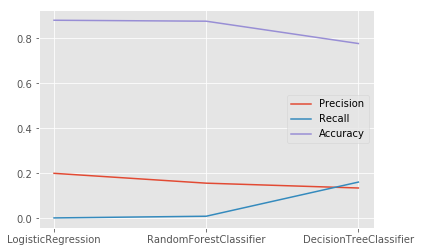

In [22]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
plt.plot('precision', data=m_df, label='Precision')
plt.plot('recall', data=m_df, label='Recall')
plt.plot('accuracy', data=m_df, label='Accuracy')
plt.legend()

In [23]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_lr_proba[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_rfc_proba[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_dtc_proba[:,1])

Возможно, где-то ошибка, а возможно 2 и 3 модель действительно выдают значительно меньше трешхолдов, однако если проверить:

```python
print(
    len(y_test),
    len(fpr_lr),
    len(fpr_rfc),
    len(fpr_dtc),
)
```
> 4478 937 8 3

По возможности, этот момент хотелось бы обсудить с преподавателем.


ROC AUC
LogisticRegression:	0.606218804840805
RandomForestClassifier:	0.5890861575160866
DecisionTreeClassifier:	0.5105446285449475



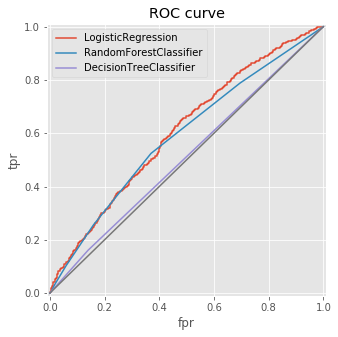

In [24]:
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression')
plt.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier')
plt.plot(fpr_dtc, tpr_dtc, label='DecisionTreeClassifier')

plt.plot([0, 1], [0, 1])

plt.title('ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(True)
plt.legend()

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

roc_auc_lr = roc_auc_score(y_test, predict_lr_proba[:,1])
roc_auc_rfc = roc_auc_score(y_test, predict_rfc_proba[:,1])
roc_auc_dtc = roc_auc_score(y_test, predict_dtc_proba[:,1])

print('''
ROC AUC
=======
LogisticRegression:\t%s
RandomForestClassifier:\t%s
DecisionTreeClassifier:\t%s
''' % (roc_auc_lr, roc_auc_rfc, roc_auc_dtc))

In [25]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv_lr, cv_rfc, cv_dtc = [cross_val_score(
    model,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
) for model in (model_lr, model_rfc, model_dtc)]

cv_average = [
    reduce(lambda x, y: x + y, cv) / len(cv)
    for cv in (cv_lr, cv_rfc, cv_dtc)
]
cv_average

[0.6043619703184004, 0.58616780368916, 0.5176136719705168]

In [26]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# overwrite previous `y_test`, used for local train/test
y_test = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop('TARGET', axis=1)

In [27]:
predict_test_lr = model_lr.predict(df_test_preproc)
predict_test_lr_proba = model_lr.predict_proba(df_test_preproc)

/Users/user/venv/jupyter/lib/python3.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


ROC AUC: 0.5905456475443398


(-0.01, 1.01)

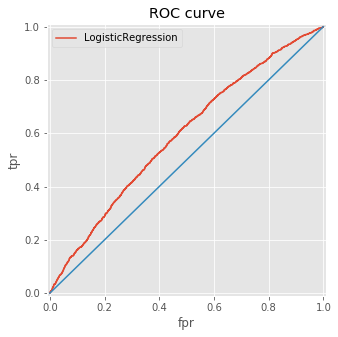

In [28]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
fpr_test_lr, tpr_test_lr, thresholds_test_lr = roc_curve(y_test, predict_test_lr_proba[:,1])
roc_auc_test_lr = roc_auc_score(y_test, predict_test_lr_proba[:,1])
print('ROC AUC: %s' % roc_auc_test_lr)

plt.figure(figsize=(5, 5))
plt.plot(fpr_test_lr, tpr_test_lr, label='LogisticRegression')

plt.plot([0, 1], [0, 1])

plt.title('ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(True)
plt.legend()

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)